<a href="https://colab.research.google.com/github/punramon/python_dataviz2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) #บังคับให้มันโหลดอีกรอบ --> เห็นdataล่าสุด

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [ ]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,Budget,8270
1,2021,Q1,North America,BrandA,Mid-range,1860
2,2021,Q1,North America,BrandA,Premium,6390
3,2021,Q1,North America,BrandB,Budget,6191
4,2021,Q1,North America,BrandB,Mid-range,6734


In [ ]:
data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')
data.head()


,Year,Quarter,Region,Brand,Price Category,Sales
0,2021,Q1,North America,BrandA,รุ่นประหยัด,8270
1,2021,Q1,North America,BrandA,รุ่นเริ่มต้น,1860
2,2021,Q1,North America,BrandA,รุ่นเรือธง,6390
3,2021,Q1,North America,BrandB,รุ่นประหยัด,6191
4,2021,Q1,North America,BrandB,รุ่นเริ่มต้น,6734


## Bar chart (กราฟแท่ง)
(กราฟผลไม้)

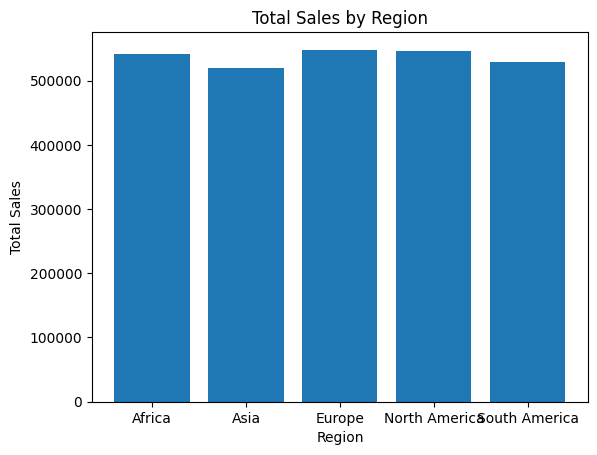

In [ ]:
# prompt: สร้าง barchart เปรียบเทียบปริมาณ sales ทั้งหมดของแต่ละ region ด้วยคำสั่ง plt.bar

import matplotlib.pyplot as plt

# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.bar(region_sales.index, region_sales.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Show the plot
plt.show()


In [ ]:
region_sales

,Sales
Region,
Africa,541556
Asia,519608
Europe,548068
North America,545563
South America,529246


In [ ]:
region_sales.reset_index()['Region']

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [ ]:
region_sales.reset_index().Region

,Region
0,Africa
1,Asia
2,Europe
3,North America
4,South America


In [ ]:
region_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

In [ ]:
region_sales.values

array([541556, 519608, 548068, 545563, 529246])

In [ ]:
# Group data by region and sum sales
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

Region         Quarter
Africa         Q1         124543
               Q2         144451
               Q3         141602
               Q4         130960
Asia           Q1         123201
               Q2         140369
               Q3         125413
               Q4         130625
Europe         Q1         136996
               Q2         139328
               Q3         141905
               Q4         129839
North America  Q1         130631
               Q2         144435
               Q3         124104
               Q4         146393
South America  Q1         127485
               Q2         138468
               Q3         132925
               Q4         130368
Name: Sales, dtype: int64

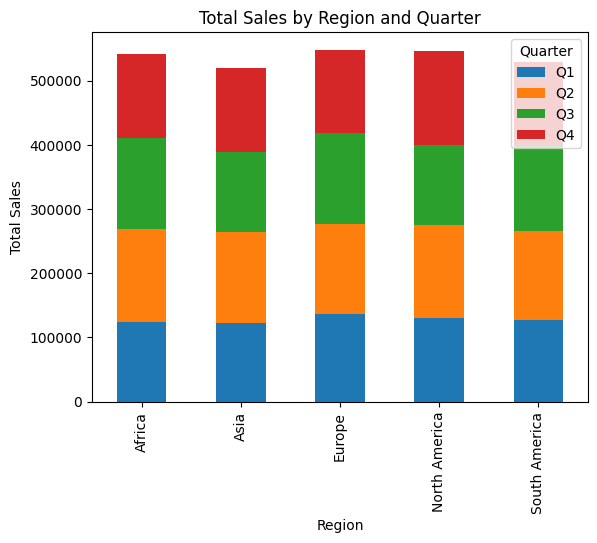

In [ ]:
# prompt: สร้าง barchart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import matplotlib.pyplot as plt

# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Show the plot
plt.show()


## polt stacked barchart ของแต่ละ region โดยดูจาก contribute จาก Price Category

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

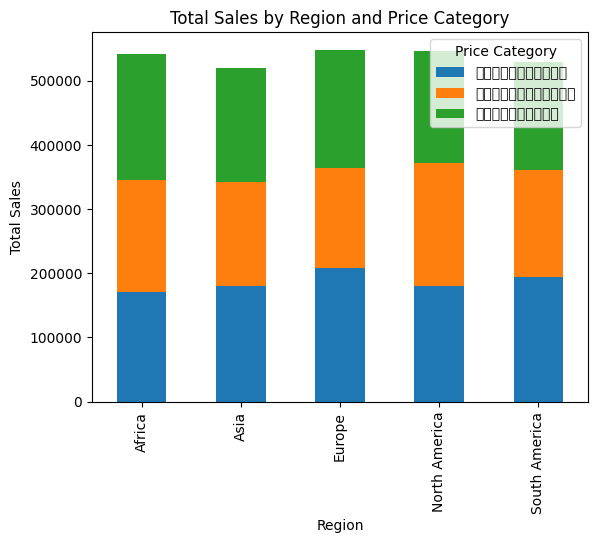

In [ ]:
# prompt: polt stacked barchart ของแต่ละ region โดยดูจาก contribute จาก Price Category

# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()


ส่วนประกอบของกราฟแท่ง


*   ตัวกราฟแท่ง (height)
*   ตำแหน่งกราฟแท่ง (x)
*   ชื่อแท่ง (tick_label)
*   ชื่อกราฟ (plt.title)
*   ชื่อแกน x (plt.xlabel)
*   ชื่อแกน y (plt.ylabel)



In [ ]:
import matplotlib
matplotlib.__version__

'3.2.2'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

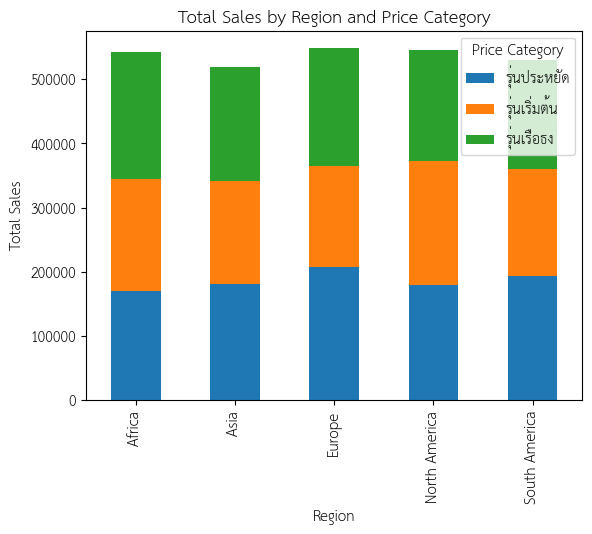

In [ ]:
# prompt: polt stacked barchart ของแต่ละ region โดยดูจาก contribute จาก Price Category

# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()

แปลผล --> เอาไปใช้ต่อได้

## plot stacked barchart ด้วย mathplotlib

In [ ]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

Brand,BrandA,BrandB,BrandC,BrandD
Region,,,,
Africa,132019,140187,132273,137077
Asia,136205,124678,139677,119048
Europe,135638,135069,131700,145661
North America,124810,153135,140802,126816
South America,144169,138543,115774,130760


In [ ]:
region_brand_sales.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'South America'], dtype='object', name='Region')

In [ ]:
region_brand_sales['BrandA'].values

array([132019, 136205, 135638, 124810, 144169])

## plot ส่วนแรก

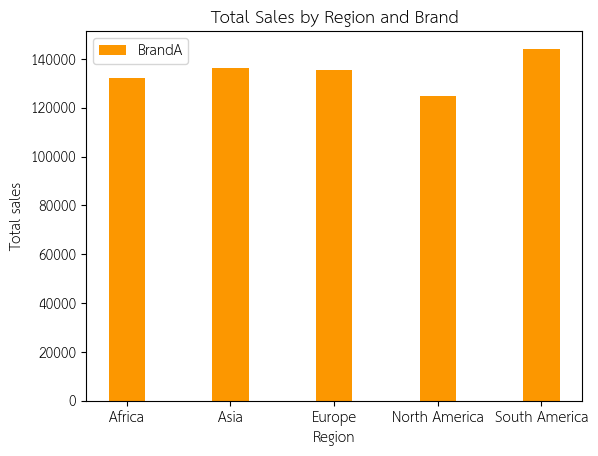

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by Region and Brand')
ax.legend()

plt.show()

## plot ส่วนที่สอง

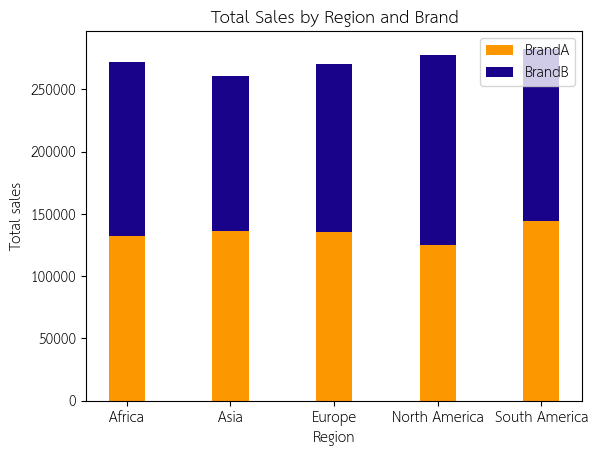

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom= region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by Region and Brand')
ax.legend()

plt.show()

## plot ส่วนที่สาม

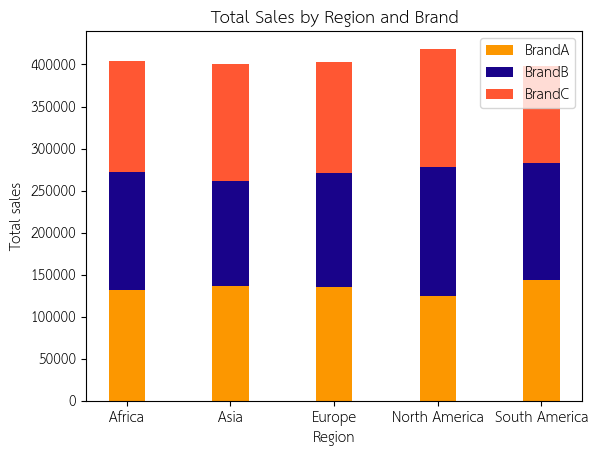

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width,
       bottom= region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width,
       bottom= region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values, label='BrandC',color = '#FF5733')
ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by Region and Brand')
ax.legend()

plt.show()

## plot ส่วนที่สี่

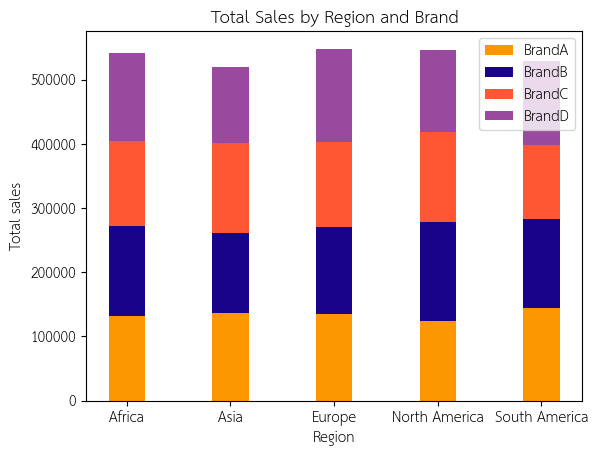

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width,
       bottom= region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width,
       bottom= region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values, label='BrandC',color = '#FF5733')
ax.bar(region_brand_sales.index, region_brand_sales['BrandD'].values, width,
       bottom= region_brand_sales['BrandA'].values+region_brand_sales['BrandB'].values+region_brand_sales['BrandC'].values, label='BrandD',color = '#9a4a9e')
ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total Sales by Region and Brand')
ax.legend()

plt.show()

* เทียบระหว่างกลุ่ม

# Grouped bar chart (เปรียบเทียบในกลุ่ม)

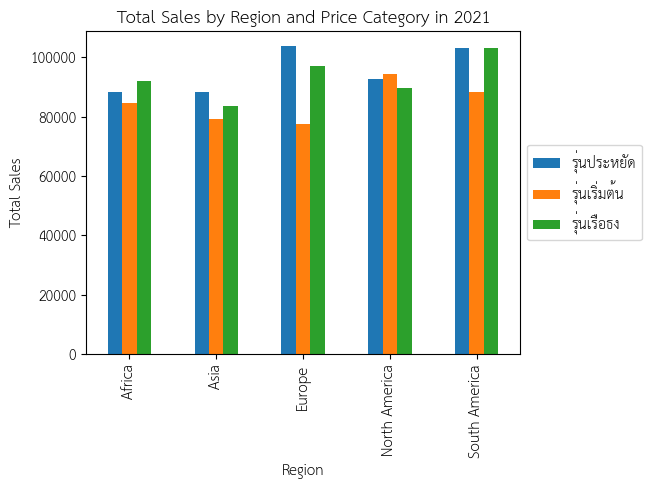

In [ ]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาดplotให้เล็กลง 30%

# Filter data for the year 2021
data_2021 = data[data['Year'] == 2021]

# Group data by region and price category, then sum sales
region_price_category_sales_2021 = data_2021.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_price_category_sales_2021.plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()


## Quiz 13

## plot grouped bar chart ของ หนังอินเดีย โดย แยกกลุ่มตามประเภทของหนัง และเปรียบเทียบ rating จาก ความยาวหนัง

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv'

In [ ]:
data_india = pd.read_csv(path_to_movie, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_india = data_india.dropna(subset=['Rating','Duration','Genre'])
data_india = data_india[['Rating','Duration','Genre']]
data_india

,Rating,Duration,Genre
1,7.0,109 min,Drama
3,4.4,110 min,"Comedy, Romance"
5,4.7,147 min,"Comedy, Drama, Musical"
6,7.4,142 min,"Drama, Romance, War"
8,5.6,82 min,"Horror, Mystery, Thriller"
...,...,...,...
15493,6.1,115 min,Drama
15494,6.2,153 min,"Biography, Drama, History"
15503,5.8,125 min,"Action, Crime, Drama"
15505,4.5,129 min,"Action, Drama"


In [ ]:
# prompt: แปล'ค่าใน column duration เป็น int โดยลบ min ออกและ เปลี่ยนชนิดข้อมูล integer

# Remove " min" from the 'Duration' column and convert to integer
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)


In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre drama, action, romance, horror, musical

# Create a dictionary to store the dataframes for each genre
genre_tables = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate over the genres and create separate dataframes
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'] == genre].copy()


In [ ]:
all_table = pd.concat(genre_tables.values())
all_table

,Rating,Duration,Genre
1,7.0,109,Drama
10,6.2,96,Drama
30,7.1,116,Drama
32,5.6,168,Drama
36,4.5,94,Drama
...,...,...,...
7422,5.1,127,Musical
7770,4.6,119,Musical
10989,6.7,125,Musical
13934,5.9,103,Musical


In [ ]:
# prompt: แบ่ง duration ออกเป็น short, medium, long โดย short สั้นกว่า 60 medium 60-90 ที่เหลือเป็น long

# Define a function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column 'Duration Category'
all_table['Duration Category'] = data_india['Duration'].apply(categorize_duration)
all_table

,Rating,Duration,Genre,Duration Category
1,7.0,109,Drama,long
10,6.2,96,Drama,long
30,7.1,116,Drama,long
32,5.6,168,Drama,long
36,4.5,94,Drama,long
...,...,...,...,...
7422,5.1,127,Musical,long
7770,4.6,119,Musical,long
10989,6.7,125,Musical,long
13934,5.9,103,Musical,long


In [ ]:
india_bar_data = all_table.groupby(['Genre','Duration Category',])['Rating'].mean().unstack()
india_bar_data

Duration Category,long,medium,short
Genre,,,
Action,5.086228,4.966667,4.500000
Drama,6.404376,6.582759,6.166667
Horror,4.622222,4.927273,4.500000
Musical,5.122222,NaN,NaN
Romance,5.523770,5.700000,6.300000


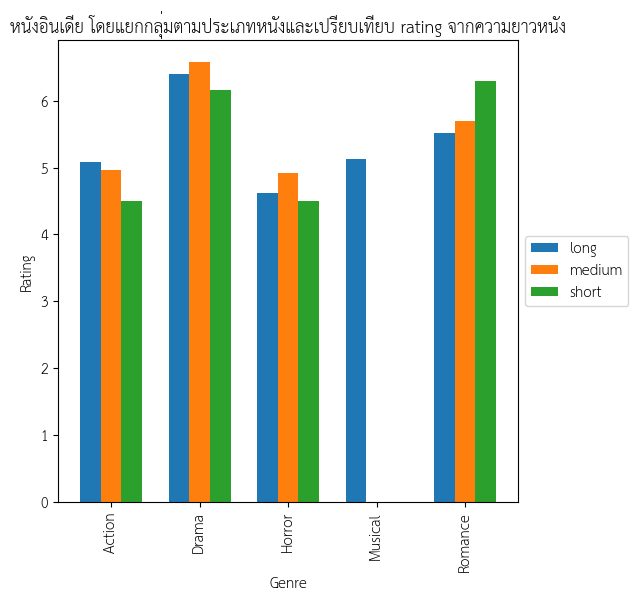

In [ ]:
ax = india_bar_data.plot(kind='bar', figsize=(8, 6), width=0.7)

#Group by
india_bar_data = all_table.groupby(['Genre','Duration Category',])['Rating'].mean().unstack()

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดยแยกกลุ่มตามประเภทหนังและเปรียบเทียบ rating จากความยาวหนัง')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot size
plt.gcf().subplots_adjust(right=0.7)

# Show the plot
plt.show()




---



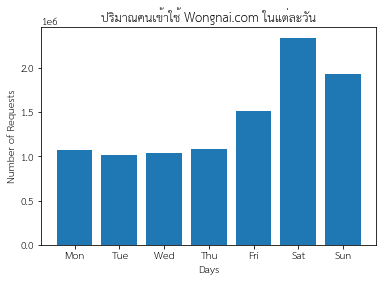

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

Text(0, 0.5, 'Number of Requests')

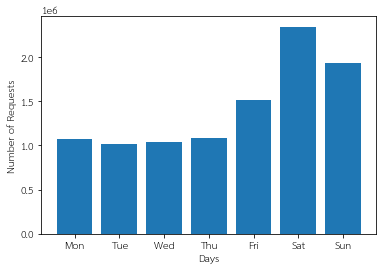

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

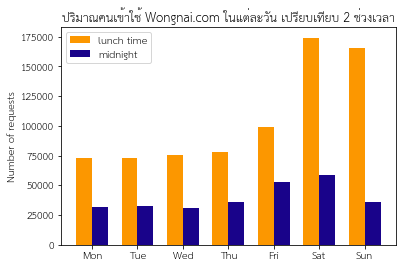

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

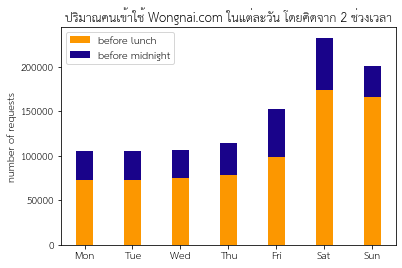

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

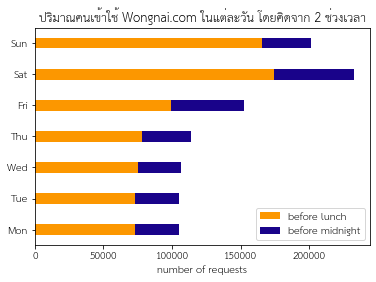

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

* ช่วยจัดกลุ่มข้อมูลด้วย
* set แท่งได้ว่าให้มีกี่แท่ง --> จัดกลุ่ม
* มีผลการนับให้ด้วย

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

(array([  2.,   2.,   2.,   4.,   9.,  14.,  17.,  39.,  47.,  59.,  90.,
        144., 159., 202., 288., 325., 388., 430., 507., 537., 604., 642.,
        650., 615., 590., 546., 534., 507., 429., 357., 323., 233., 196.,
        171., 113.,  73.,  51.,  36.,  26.,  22.,   5.,   3.,   2.,   2.,
          2.,   0.,   2.,   0.,   0.,   1.]),
 array([ 44.90650513,  47.32901741,  49.7515297 ,  52.17404198,
         54.59655427,  57.01906656,  59.44157884,  61.86409113,
         64.28660341,  66.7091157 ,  69.13162798,  71.55414027,
         73.97665256,  76.39916484,  78.82167713,  81.24418941,
         83.6667017 ,  86.08921398,  88.51172627,  90.93423856,
         93.35675084,  95.77926313,  98.20177541, 100.6242877 ,
        103.04679998, 105.46931227, 107.89182456, 110.31433684,
        112.73684913, 115.15936141, 117.5818737 , 120.00438598,
        122.42689827, 124.84941056, 127.27192284, 129.69443513,
        132.11694741, 134.5394597 , 136.96197198, 139.38448427,
        141.806996

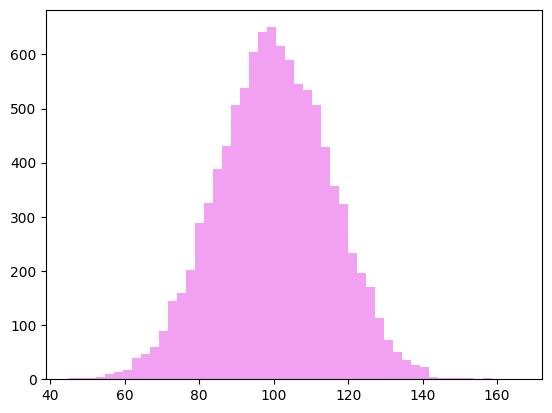

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15 # ค่าเฉลี่ย, ส่วนเบี่ยงเบน
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75)  # แบ่งเป็น bin = 50, density = true เอาจน.ที่นับหารทั้งหมด

## ทดสอบกับหนังอินเดีย

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv'

In [ ]:
data_india = pd.read_csv(path_to_movie, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


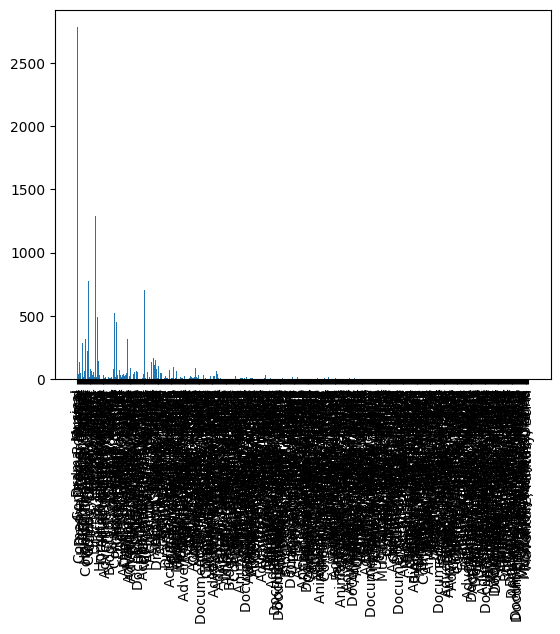

In [ ]:
plt.hist(data_india.dropna(subset=['Genre'])['Genre'],bins=len(set(data_india.dropna(subset=['Genre'])['Genre']))) #นับจำนวน ไม่ได้กำหนดเอง
plt.xticks(rotation='vertical');

In [ ]:
len(set(data_india.dropna(subset=['Genre'])['Genre']))

485

In [ ]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None


In [ ]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [ ]:
allGenre = list(data_india['Genre1'])+list(data_india['Genre2'])+list(data_india['Genre3'])

In [ ]:
len(set(allGenre))

25

In [ ]:
allGenre

['Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Horror',
 'Action',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Thriller',
 'Comedy',
 nan,
 'Comedy',
 'Comedy',
 nan,
 'Comedy',
 'Crime',
 'Horror',
 'Biography',
 'Documentary',
 'Comedy',
 'Action',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 nan,
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Horror',
 'Drama',
 'Horror',
 'Action',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Adventure',
 'Action',
 'Drama',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Drama',
 'Comedy',
 'War',
 'Thriller',
 'Drama',
 'Sport',
 'Biography',
 'Thriller',
 nan,
 nan,
 'Drama',
 'Drama',
 'Drama',
 'Horror',
 'Comedy',
 'Comedy',
 'Crime',
 'Comedy',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Adventure',
 'Horror',
 'Thriller',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Horror',
 'Horror',
 'Horror',
 'C

In [ ]:
# prompt: delete all None from the allGenre list

allGenre = [x for x in allGenre if x is not None]

In [ ]:
len(set(allGenre))

25

In [ ]:
import matplotlib.pyplot as plt

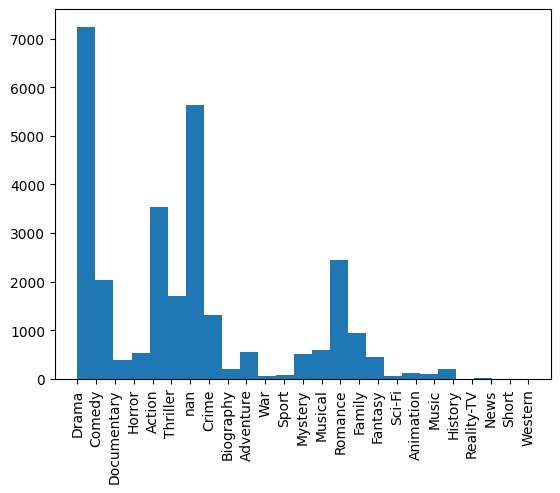

In [ ]:
plt.hist(allGenre,bins = len(set(allGenre)))
plt.xticks(rotation='vertical');

# Quiz 15 หาพระเอก-นางเอก ที่มักจะแสดงคู่กันด้วยHistrogram (พระเอก Actor1, นางเอก=Actor2 )

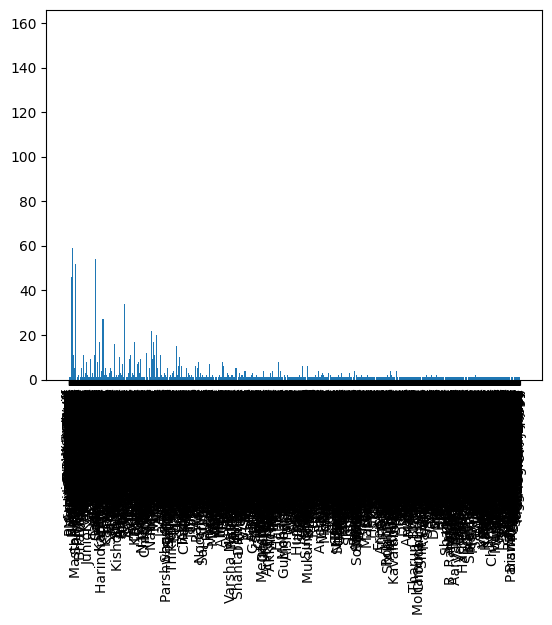

In [ ]:
# prompt: หาพระเอก-นางเอก ที่แสดงคู่กันมากที่สุดด้วย plt.hist (พระเอก Actor1, นางเอก=Actor2 )

# Assuming 'data_india' is your DataFrame and 'Actor 1' and 'Actor 2' are the columns for actors
plt.hist(data_india.dropna(subset=['Actor 1', 'Actor 2'])['Actor 1'], bins=len(set(data_india.dropna(subset=['Actor 1'])['Actor 1'])))
plt.xticks(rotation='vertical');


In [ ]:
# prompt: หาActor1และActor2 ที่แสดงคู่กันมากที่สุด

# Assuming 'data_india' is your DataFrame and 'Actor 1' and 'Actor 2' are the columns for actors
actor_pairs = data_india.dropna(subset=['Actor 1', 'Actor 2'])[['Actor 1', 'Actor 2']]
actor_pairs['Pair'] = actor_pairs['Actor 1'] + " & " + actor_pairs['Actor 2']
pair_counts = actor_pairs['Pair'].value_counts()
print(pair_counts.head(10))  # Print the most frequent pair


Pair
Jeetendra & Rekha                  21
Dharmendra & Hema Malini           16
Jeetendra & Jaya Prada             15
Dara Singh & Mumtaz                11
Jeetendra & Hema Malini            10
Fearless Nadia & John Cawas        10
Ashok Kumar & Nalini Jaywant       10
Jeetendra & Reena Roy              10
Rajesh Khanna & Sharmila Tagore    10
Chitra & Daljeet                    9
Name: count, dtype: int64


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

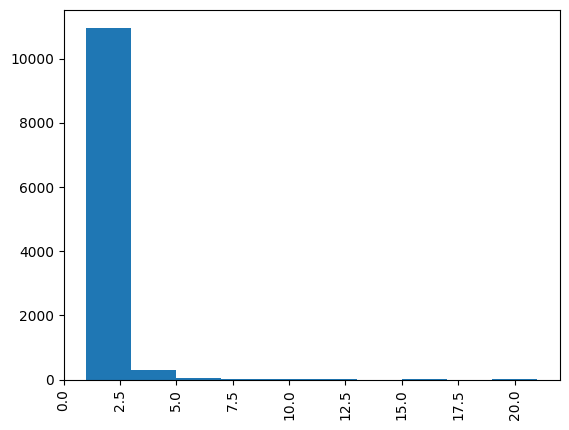

In [ ]:
plt.hist(pair_counts)
plt.xticks(rotation=90)

In [ ]:
# prompt: หาActor1และActor2 ที่แสดงคู่กันมากที่สุด ตัดเอาคู่ที่ด้วยกันรอบ 1 ออก

# Assuming 'data_india' is your DataFrame and 'Actor 1' and 'Actor 2' are the columns for actors
actor_pairs = data_india.dropna(subset=['Actor 1', 'Actor 2'])[['Actor 1', 'Actor 2']]
actor_pairs['Pair'] = actor_pairs['Actor 1'] + " & " + actor_pairs['Actor 2']
pair_counts = actor_pairs['Pair'].value_counts()
# Filter out pairs with only one occurrence
filtered_pair_counts = pair_counts[pair_counts > 1]
print(filtered_pair_counts.head(10))  # Print the most frequent pair


Pair
Jeetendra & Rekha                  21
Dharmendra & Hema Malini           16
Jeetendra & Jaya Prada             15
Dara Singh & Mumtaz                11
Jeetendra & Hema Malini            10
Fearless Nadia & John Cawas        10
Ashok Kumar & Nalini Jaywant       10
Jeetendra & Reena Roy              10
Rajesh Khanna & Sharmila Tagore    10
Chitra & Daljeet                    9
Name: count, dtype: int64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

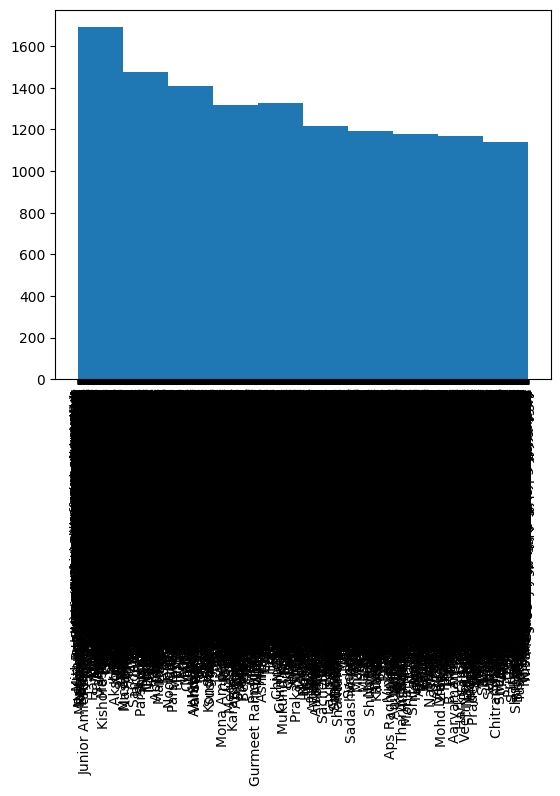

In [ ]:
plt.hist(actor_pairs['Pair'])
plt.xticks(rotation=90)



---



ตัวอย่างข้อมูล wongnai.com

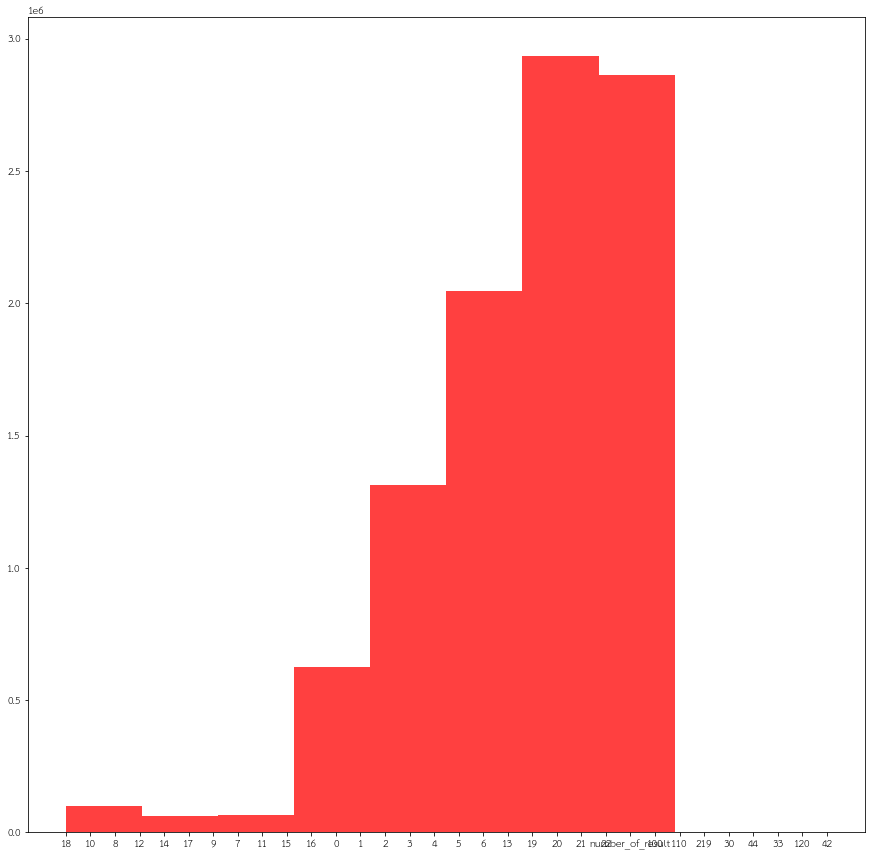

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

Unnamed: 0                   int64
search_id                   object
search_timestamp    datetime64[ns]
user_agent                  object
q                           object
user_id                    float64
session_id                  object
number_of_result            object
lat                         object
long                        object
dtype: object

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ValueError: ignored

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,NaT,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [ ]:
new_type = data['number_of_result'].astype('int32')

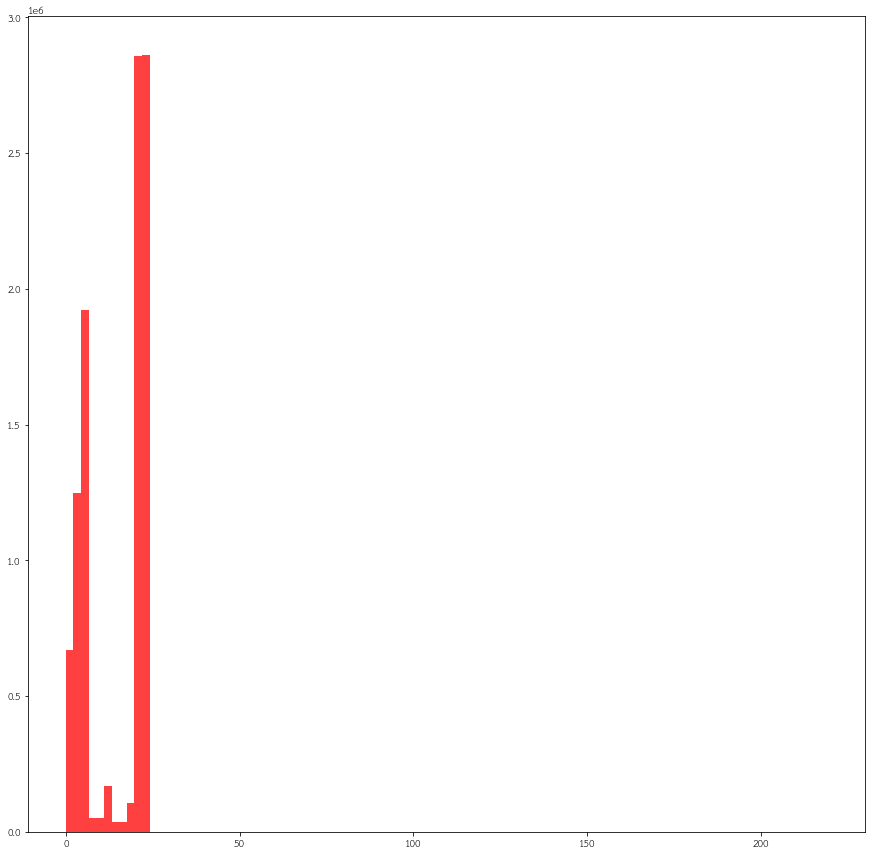

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

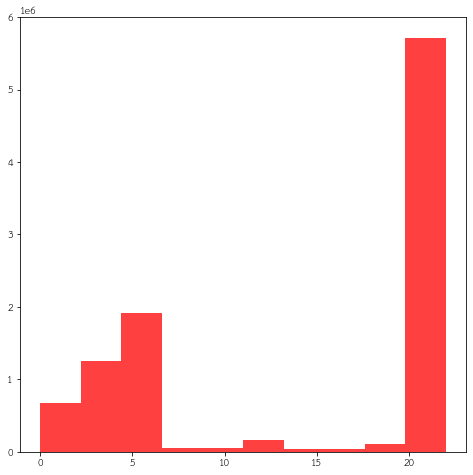

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

(array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
          36883.,   35914.,  105490., 5717238.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

In [ ]:
output[0]

array([ 670293., 1247269., 1921441.,   51703.,   50609.,  167502.,
         36883.,   35914.,  105490., 5717238.])

In [ ]:
output[0][-1]

5717238.0

In [ ]:
sum(output[0][:-1])

4287104.0



---



## Tree map

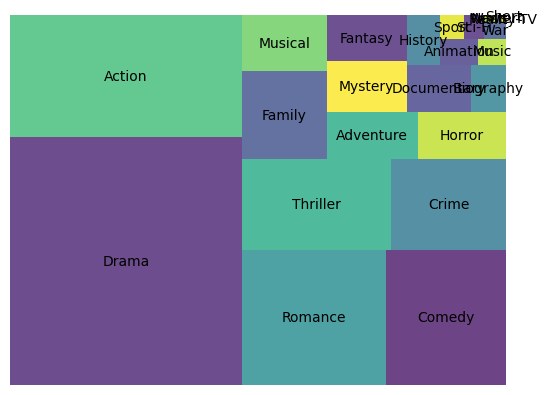

In [ ]:
# prompt: plot treemap of the genre

import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify

import squarify

# Assuming 'allGenre' contains the list of genres you want to plot
genre_counts = pd.Series(allGenre).value_counts()

# Create the treemap
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=.8 )
plt.axis('off')
plt.show()

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [ ]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

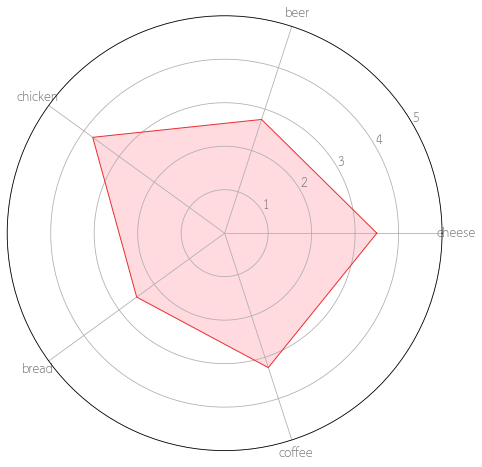

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

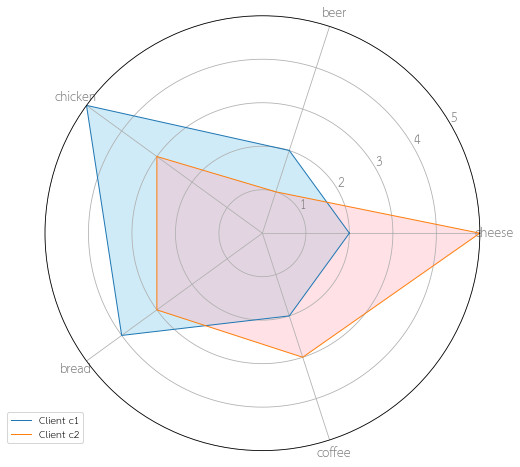

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# HW9 present radar chart data india

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv'

In [ ]:
data_india = pd.read_csv(path_to_movie, encoding='latin-1')
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ตรวจสอบค่า null
data_india.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data_india = data_india.dropna(subset=['Rating', 'Votes','Duration','Genre','Actor 1','Actor 2'])

In [ ]:
data_india['Year'] =data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)
data_india['Votes'] = data_india['Votes'].str.replace(',', '')

<ipython-input-164-d4b5746bc2e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Year'] =data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
<ipython-input-164-d4b5746bc2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)
<ipython-input-164-d4b5746bc2e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
# ตรวจสอบและแปลงคอลัมน์ Votes เป็น float
data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')

<ipython-input-165-19497a595d1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')


In [ ]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
#หลังdropnaแล้วข้อมูลเหลือกี่%จากเดิม

print(f"ข้อมูลเหลือ {(len(data_india) / len(pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 36.79% จากเดิม


In [ ]:
data_india.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,46


In [ ]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller


In [ ]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [ ]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None,None
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,Drama,History
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime,Drama
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None


In [ ]:
# prompt: เลือกผู้กำกับที่มี Rating และ Votes มากกว่า 75%
# top_directors = movie_df[(movie_df['Rating'] >= rating_q3) & (movie_df['Votes'] >= tes_q3)]['Director'].value_counts() และ คิดเกณฑ์คะแนนถ่วงน้ำหนัก Votes และ rating ให้ rating 60% และ Votes 40% ถ่วงให้ไม่เกิน 100%
# Calculate the 75th percentile for Rating and Votes
rating_q3 = data_india['Rating'].quantile(0.75)
tes_q3 = data_india['Votes'].quantile(0.75)

# Filter the DataFrame to include only directors with Rating and Votes above the 75th percentile
top_directors = data_india[(data_india['Rating'] >= rating_q3) & (data_india['Votes'] >= tes_q3)]['Director'].value_counts()
top_directors

,count
Director,
Yash Chopra,11
Ram Gopal Varma,10
Hrishikesh Mukherjee,10
Anurag Kashyap,10
Nagesh Kukunoor,8
...,...
Shubhashish Bhutiani,1
Leslee Udwin,1
Abhay Chopra,1


In [ ]:
data_india[data_india['Director'] == 'Hrishikesh Mukherjee']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
479,Aashiq,1962,150,Romance,6.7,64,Hrishikesh Mukherjee,Raj Kapoor,Padmini,Nanda,Romance,None,None
487,Aashirwad,1968,146,Drama,7.3,203,Hrishikesh Mukherjee,Ashok Kumar,Sanjeev Kumar,Sumita Sanyal,Drama,None,None
563,Abhimaan,1973,122,"Drama, Musical",7.9,2665,Hrishikesh Mukherjee,Amitabh Bachchan,Jaya Bachchan,Asrani,Drama,Musical,None
806,Alaap,1977,160,"Drama, Musical",6.7,327,Hrishikesh Mukherjee,Amitabh Bachchan,Rekha,Chhayadevi,Drama,Musical,None
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal,Drama,Musical,None
993,Anari,1959,166,"Comedy, Drama, Musical",7.9,740,Hrishikesh Mukherjee,Raj Kapoor,Nutan,Lalita Pawar,Comedy,Drama,Musical
1174,Anupama,1966,148,"Drama, Romance",7.4,416,Hrishikesh Mukherjee,Dharmendra,Sharmila Tagore,Shashikala,Drama,Romance,None
1177,Anuradha,1960,141,"Drama, Romance",6.6,196,Hrishikesh Mukherjee,Balraj Sahni,Leela Naidu,Abhi Bhattacharya,Drama,Romance,None
1325,Asli-Naqli,1962,145,"Drama, Musical, Romance",7.5,257,Hrishikesh Mukherjee,Dev Anand,Sadhana,Nasir Hussain,Drama,Musical,Romance
1927,Bawarchi,1972,130,"Comedy, Musical, Drama",8.0,3793,Hrishikesh Mukherjee,Rajesh Khanna,Jaya Bachchan,Usha Kiran,Comedy,Musical,Drama


In [ ]:
# prompt: ดึงข้อมูลของ Yash Chopra, Ram Gopal Varma, Hrishikesh Mukherjee, Anurag Kashyap, Nagesh Kukunoor มาเป็นdataframeใหม่

directors_to_extract = ['Yash Chopra', 'Ram Gopal Varma', 'Hrishikesh Mukherjee', 'Anurag Kashyap', 'Nagesh Kukunoor']
top = data_india[data_india['Director'].isin(directors_to_extract)].copy()
top


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
22,12 O'Clock,2021,105,"Horror, Thriller",4.4,63,Ram Gopal Varma,Mithun Chakraborty,Makrand Deshpande,Dalip Tahil,Horror,Thriller,None
73,3 Deewarein,2003,115,"Crime, Drama",7.8,2322,Nagesh Kukunoor,Naseeruddin Shah,Jackie Shroff,Juhi Chawla,Crime,Drama,None
125,8 x 10 Tasveer,2009,122,"Action, Fantasy, Mystery",5.4,5459,Nagesh Kukunoor,Akshay Kumar,Ayesha Takia,Javed Jaffrey,Action,Fantasy,Mystery
216,Aadmi Aur Insaan,1969,168,"Drama, Romance, Thriller",6.2,149,Yash Chopra,Dharmendra,Saira Banu,Feroz Khan,Drama,Romance,Thriller
475,Aashayein,2010,120,Drama,7.1,1259,Nagesh Kukunoor,John Abraham,Anaitha Nair,Girish Karnad,Drama,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14582,Ugly,2013,128,"Crime, Drama, Mystery",8.0,20709,Anurag Kashyap,Rahul Bhatt,Ronit Roy,Tejaswini Kolhapure,Crime,Drama,Mystery
14816,Veerappan,2016,125,"Action, Biography, Crime",5.3,711,Ram Gopal Varma,Sachiin Joshi,Sandeep Bharadwaj,Usha Jadhav,Action,Biography,Crime
14826,Veer-Zaara,2004,192,"Drama, Family, Musical",7.8,50101,Yash Chopra,Shah Rukh Khan,Preity Zinta,Rani Mukerji,Drama,Family,Musical
14864,Vijay,1988,172,"Action, Drama, Romance",5.6,219,Yash Chopra,Anil Kapoor,Rajesh Khanna,Rishi Kapoor,Action,Drama,Romance


In [ ]:
# prompt: Using dataframe top: สร้าง bar  นับจำนวน Genre1  Genre2  Genre3 ของ director ใช้ px

import plotly.express as px

# Group by director and count the number of each genre
genre_counts = top.groupby(['Director', 'Genre1'])['Name'].count().reset_index(name='Count')
genre_counts2 = top.groupby(['Director', 'Genre2'])['Name'].count().reset_index(name='Count')
genre_counts3 = top.groupby(['Director', 'Genre3'])['Name'].count().reset_index(name='Count')

# Create a bar chart using Plotly Express
fig = px.bar(genre_counts, x='Director', y='Count', color='Genre1', barmode='group', title='Genre1 Count by Director')
fig.show()

fig2 = px.bar(genre_counts2, x='Director', y='Count', color='Genre2', barmode='group', title='Genre2 Count by Director')
fig2.show()

fig3 = px.bar(genre_counts3, x='Director', y='Count', color='Genre3', barmode='group', title='Genre3 Count by Director')
fig3.show()



In [ ]:
# prompt: Using dataframe top: plot radar chart count 'Name' that 'Director' own

# Assuming you want to plot a radar chart showing the count of movies directed by each director.
import plotly.express as px

# Group by 'Director' and count the number of movies directed by each.
director_counts = top.groupby('Director')['Name'].count().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_counts, r='Name', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()



In [ ]:
director_votes = top.groupby('Director')['Votes'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_votes, r='Votes', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
director_Rating = top.groupby('Director')['Rating'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_Rating, r='Rating', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
director_Duration = top.groupby('Director')['Duration'].mean().reset_index()

# Create the radar chart using Plotly Express.
fig = px.line_polar(director_Duration, r='Duration', theta='Director', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,Votes_Normalized,Rating_Normalized,Weighted_Score
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None,0.000507,66.292135,39.775484
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None,0.005073,37.078652,22.249220
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy,Drama,Musical,0.138989,40.449438,24.325259
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama,Romance,War,0.182783,70.786517,42.545023
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror,Mystery,Thriller,0.054277,50.561798,30.358789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama,None,None,0.068142,56.179775,33.735122
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography,Drama,History,0.252109,57.303371,34.482866
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action,Crime,Drama,0.006594,52.808989,31.688031
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action,Drama,None,0.109906,38.202247,22.965311


In [ ]:
data_india[data_india['Director'] == 'Saif Ali Sayeed']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3,Votes_Normalized,Weighted_Score,Rating_Normalized
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari,Drama,Romance,None,0.0,60.0,100.0


In [ ]:
allgenre = list(top['Genre1'])+list(top['Genre2'])+list(top['Genre3'])
allgenre

['Horror',
 'Crime',
 'Action',
 'Drama',
 'Drama',
 'Romance',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Musical',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Action',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Action',
 'Action',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 'Action',
 'Drama',
 'Crime',
 'Comedy',
 'Comedy',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Comedy',
 'Comedy',
 'Drama',
 'Action',
 'Drama',
 'Action',
 'Drama',
 'Mystery',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Action',
 'Comedy',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Crime',
 'Crime',
 'Action',
 'Romance',
 'Drama',
 'Crime',
 'Comedy',
 'Horror',
 'Comedy',
 'Action',
 'Action',
 'Action',
 'Comedy',
 'Comedy',
 'Drama',
 'Animation',
 'Co

In [190]:
# prompt: allgenreที่ไม่ซ้ำ

unique_genres = list(set([genre for genre in allgenre if genre is not None]))
print(unique_genres)


['Comedy', 'Horror', 'Musical', 'Crime', 'Animation', 'Biography', 'Drama', 'Sport', 'Mystery', 'Romance', 'Music', 'Fantasy', 'Thriller', 'Family', 'Adventure', 'History', 'Action']


In [ ]:
.unq

In [ ]:
len(set(allgenre))

18

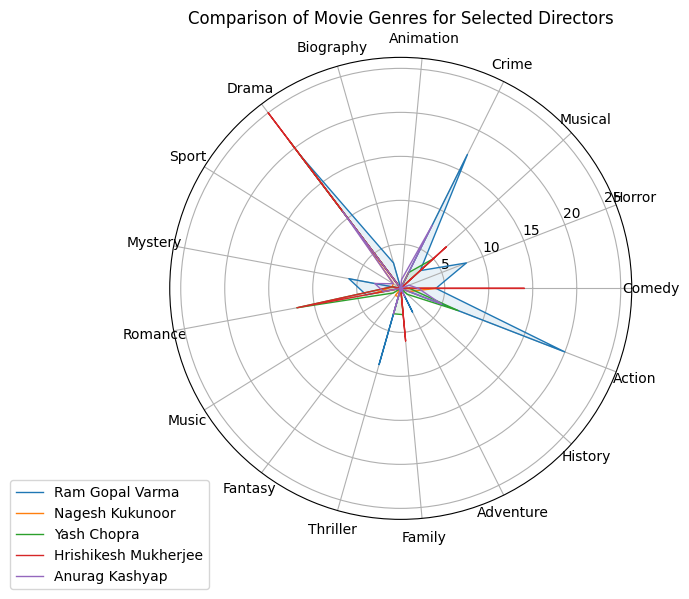

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi



df = pd.DataFrame(top)

# รายการแนวหนังที่ต้องการพิจารณา
unique_genres = list(set([genre for genre in allgenre if genre is not None]))
# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ (ตัวอย่าง Director A และ Director B)
#selected_directors = ['Director A', 'Director B'] #This line caused the error
selected_directors = df['Director'].unique()[:5] # Select the first two directors from your dataframe instead

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # ทำให้กราฟปิดวงกลม

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=director)
    ax.fill(angles, values, alpha=0.1)

# ตั้งค่าแกนและชื่อของแต่ละ Genre
plt.xticks(angles[:-1], categories)

# เพิ่มชื่อเรื่องและแสดงผลลัพธ์
plt.title('Comparison of Movie Genres for Selected Directors')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

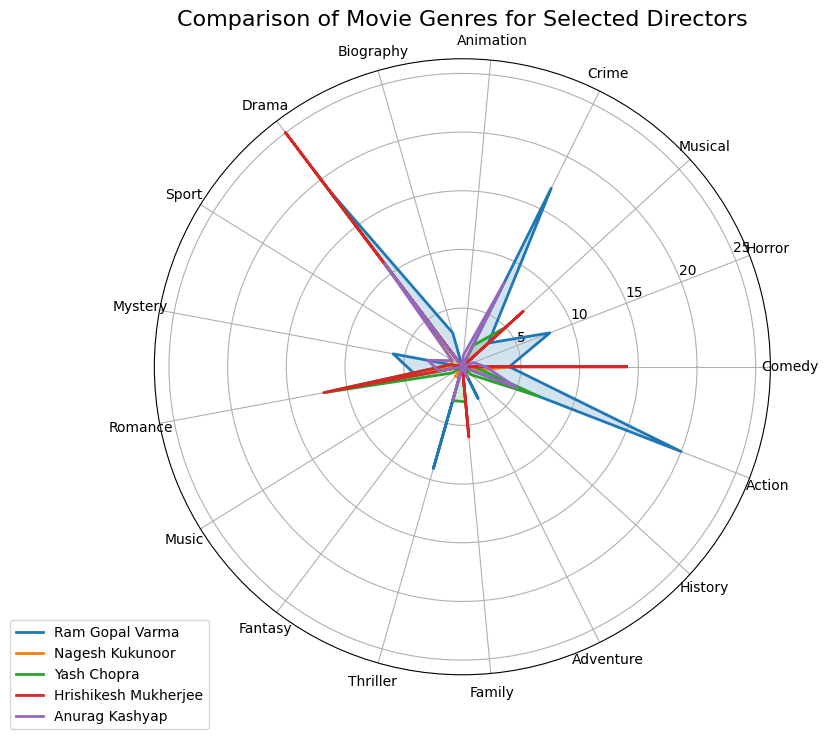

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# ตัวอย่างการอ่านข้อมูลจากไฟล์ CSV (ถ้ามีการโหลดข้อมูลจากไฟล์อื่น)
# df = pd.read_csv('your_data.csv')

# สำหรับไฟล์ที่คุณให้มา สามารถอ่านข้อมูลนี้แทนได้:
df = pd.DataFrame(top)  # นำข้อมูลจาก 'top' ที่คุณมีอยู่แล้ว

# รายการแนวหนังที่ต้องการพิจารณา
allgenre = df[['Genre1', 'Genre2', 'Genre3']].values.flatten().tolist()
unique_genres = list(set([genre for genre in allgenre if genre != '' and genre is not None]))

# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ (ตัวอย่างใช้ 5 คนแรก)
selected_directors = df['Director'].unique()[:5]

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres
N = len(categories)

# สร้างมุมสำหรับการวาด Radar Chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # ทำให้กราฟปิดวงกลม

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop เพื่อเพิ่มเส้นและพื้นที่สำหรับผู้กำกับแต่ละคน
for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=director)
    ax.fill(angles, values, alpha=0.2)

# ตั้งค่าแกนและชื่อของแต่ละ Genre
plt.xticks(angles[:-1], categories)

# เพิ่มชื่อเรื่องและแสดงผลลัพธ์
plt.title('Comparison of Movie Genres for Selected Directors', size=16, color='black')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# แสดงกราฟ
plt.show()


In [199]:
import pandas as pd
import plotly.graph_objects as go

# เตรียมข้อมูล
df = pd.DataFrame(top)

# รายการแนวหนังที่ต้องการพิจารณา
allgenre = df[['Genre1', 'Genre2', 'Genre3']].values.flatten().tolist()
unique_genres = list(set([genre for genre in allgenre if genre != '' and genre is not None]))

# คำนวณจำนวนหนังในแต่ละ Genre ที่ผู้กำกับแต่ละคนทำ
director_genre_count = {director: {genre: 0 for genre in unique_genres} for director in df['Director'].unique()}

# นับจำนวนหนังของผู้กำกับแต่ละคนในแต่ละ Genre
for _, row in df.iterrows():
    movie_genres = {row['Genre1'], row['Genre2'], row['Genre3']}
    movie_genres = {g for g in movie_genres if g != ''}  # เอา genre ที่ไม่ว่าง

    director = row['Director']
    for genre in movie_genres:
        if genre in director_genre_count[director]:
            director_genre_count[director][genre] += 1

# เลือกผู้กำกับที่ต้องการเปรียบเทียบ
selected_directors = df['Director'].unique()[:5]

# เตรียมข้อมูลสำหรับ Radar Chart
categories = unique_genres

# สร้างกราฟ Radar แบบโต้ตอบ
fig = go.Figure()

for director in selected_directors:
    values = list(director_genre_count[director].values())
    values += values[:1]  # ทำให้กราฟปิดวงกลม

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories + [categories[0]],  # เพื่อปิดกราฟ
        fill='toself',
        name=director
    ))

# ตั้งค่า layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(max(director_genre_count[director].values()) for director in selected_directors)])
    ),
    title="Comparison of Movie Genres for Selected Directors",
    showlegend=True
)

# แสดงกราฟ
fig.show()
